# Objetivo do Projeto

Este projeto tem como objetivo analisar a relação entre importantes índices econômicos, da economia brasileira, nos últimos 15 anos. Vamos estudar a relação entre a Taxa Selic, o IPCA e a Taxa de Câmbio de Dólar, para compreender tendências de mercado e gerar insights para tomada de decisão. Para isso, foram utilizados dados reais extraídos da API do Banco Central.

## Entendendo os Índices Econômicos

- Selic: é a taxa básica de juros da economia, influencia as outras taxas de juros do país, como empréstimos, financiamentos e aplicações financeiras. é o principal instrumento para controle da inflação.

- IPCA: é o índice oficial de inflação do país. A variação desse indicador reflete o custo de vida médio do população.

- Taxa de Câmbio (Dólar): o Dólar é a moeda de referência mundial, afetando diretamente as transações comerciais internacionais. Sua valorização ou desvalorização impacta a economia de países importadores e exportadores.

## Relação entre os Índices

- Selic vs Inflação: uma alta na Selic busca reduzir e controlar a inflação, processo que pode levar meses para ter efeito.

- Câmbio vs Inflação: um Dólar em alta (Real desvalorizado) também pode pressionar a inflação, importados ficam mais caros. Já o Dólar em baixa (Real valorizado) ajuda a conter a inflação, porém pode prejudicar as exportações.

- Câmbio vs Selic: uma alta na Selic tende a atrair capital estrangeiro para o país, podendo fortalecer a moeda local.

## Importação das Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.api import VAR
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import jarque_bera
import warnings
warnings.filterwarnings('ignore')

# Configurar estilos
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("tab10")

## Importação dos Dados

In [2]:
df = pd.read_csv('./dados_financeiros.csv', sep=';', encoding='utf-8', index_col = 0, parse_dates = True)

In [3]:
df.head()

,selic,ipca,dolar
data,,,
2010-01-01,8.65,4.59,1.8748
2010-02-01,8.65,4.83,1.8110
2010-03-01,8.65,5.17,1.7810
2010-04-01,8.72,5.26,1.7306
2010-05-01,9.40,5.22,1.8167


## Análise Exploratória

### Linhas temporais

<Axes: xlabel='data'>

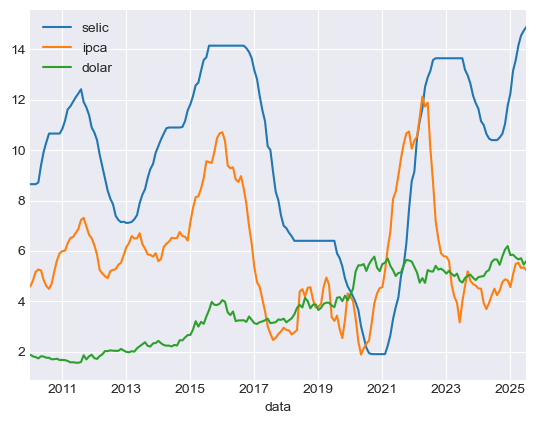

In [4]:
df.plot()

### Resumo estatístico

In [5]:
df.describe()

,selic,ipca,dolar
count,187.000000,187.000000,187.000000
mean,9.674920,5.846257,3.667724
std,3.507216,2.283946,1.411616
min,1.900000,1.880000,1.556300
25%,7.055000,4.405000,2.239300
50%,10.500000,5.350000,3.646700
75%,12.545000,6.705000,5.110450
max,14.900000,12.130000,6.192300


- Selic (juros básicos):

Média: ~ 9% ao ano -> bem alta se comparada com padrões internacionais

Mínimo: 1,95% -> como podemos ver no gráfico este valor representa o período de 2020-2021 (pandemia), quando o BC derrubou os juros para tentar reaquecer a economia

Máximo: 14,9% -> período atual, o BC eleva as taxas de juros devido ao período de instabilidade nas políticas econômicas nacionais e internacionais.

Dispersão: std ~ 3,5% -> mostra ciclos longos e bem marcados de alta e baixa

A Selic brasileira é cíclica, refletindo a tentativa constante do BC de controlar os choques inflacionários.

- IPCA (inflação):

Média: ~ 5,8% -> acima da meta na maioria dos anos

Mínimo: 1,88% -> entre 2017/2020 período de baixa demanda antes da pandemia global

Máximo: 12,13% -> 2021-2022 choque inflacionário global

Dispersão: std ~ 2,3 -> mostra volatilidade significativa

O Brasil convive com uma inflação estruturalmente alta e sensível a choques internos e externos.

- Câmbio (Real/Dólar):

Média: ~ R$3,67/USD -> condizente com a trajetória do Real ao longo dos últimos 15 anos

Mínimo: R$1,55/USD -> 2011, período de investimentos estrangeiros e entrada de dólares no país

Máximo: R$6,19/USD -> 2024-2025, período de incertezas políticas e econômicas, saída de Dólar do país

O Real teve uma forte desvalorização desde 2011, devido a períodos de recessão (2015-2016), pandemia global (2020-2021) e uma desconfiança política e econômica no atual momento.

### Boxplot

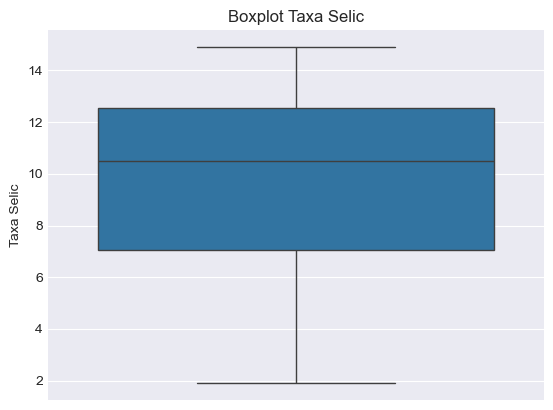

In [6]:
plt.title('Boxplot Taxa Selic')
plt.ylabel('Taxa Selic')
sns.boxplot(data = df, y='selic')
plt.show()

O gráfico ajuda a mostrar a elevada distrubuição da taxa Selic, com mediana em 10,5% ao ano (maior ainda do que a média).

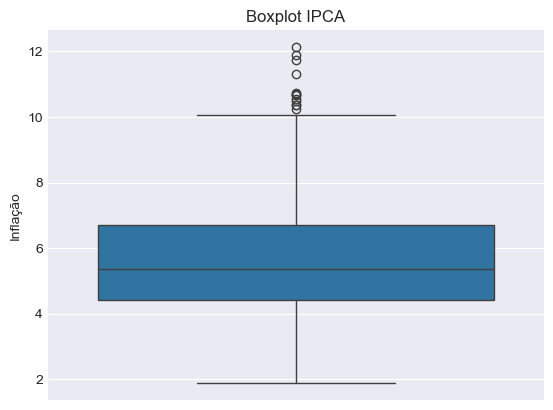

In [7]:
plt.title('Boxplot IPCA')
plt.ylabel('Inflação')
sns.boxplot(data = df, y='ipca')
plt.show()

Aqui o gráfico nos mostra os valores outliers devido aos períodos de pico inflacionário, recessão 2015-2016 e a pandemia global 2020-2021, com mediana em 5,3% (também acima da meta).

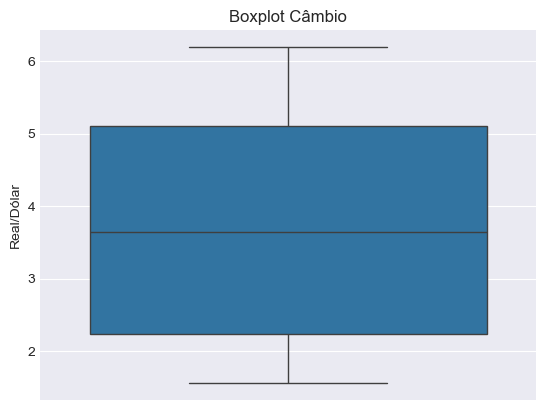

In [8]:
plt.title('Boxplot Câmbio')
plt.ylabel('Real/Dólar')
sns.boxplot(data = df, y='dolar')
plt.show()

O gráfico nos mostra que a distribuição da taxa de câmbio vem acompanhando o declínio da economia brasileira desde 2010.

### Histogramas

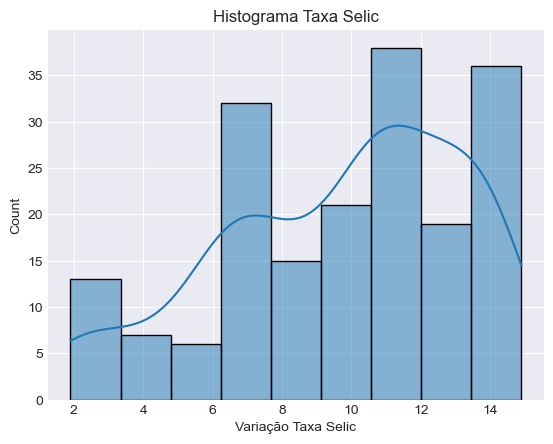

In [9]:
plt.title('Histograma Taxa Selic')
plt.xlabel('Variação Taxa Selic')
sns.histplot(df, x='selic', kde=True)
plt.show()

O gráfico apresenta uma distribuição assimétrica à esquerda multimodal.

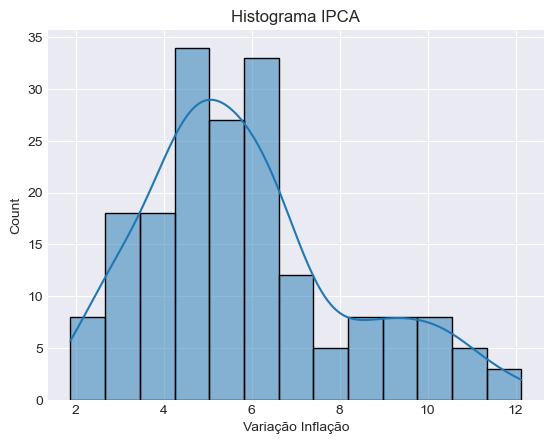

In [10]:
plt.title('Histograma IPCA')
plt.xlabel('Variação Inflação')
sns.histplot(df, x='ipca', kde=True)
plt.show()

O gráfico apresenta uma distribuição assimétrica à direita unimodal.

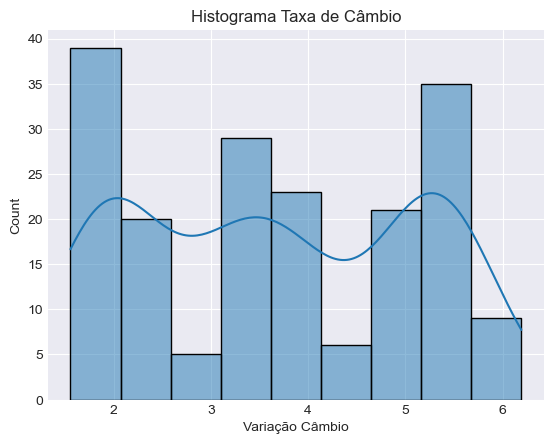

In [11]:
plt.title('Histograma Taxa de Câmbio')
plt.xlabel('Variação Câmbio')
sns.histplot(df, x='dolar', kde=True)
plt.show()

O gráfico apresenta uma distribuição simétrica multimodal.

### Correlação

<Axes: title={'center': 'Correlação Selic x IPCA x Dólar'}>

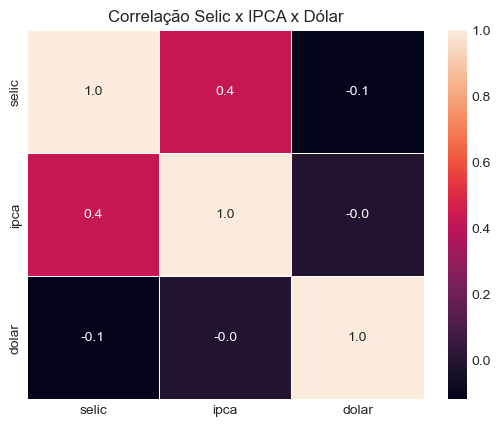

In [12]:
correlation = df.corr()
plt.title('Correlação Selic x IPCA x Dólar')
sns.heatmap(correlation, annot=True, fmt='.1f', linewidths=.6)

Através desta Matriz de Correlação podemos perceber que, no geral, os índices não estão muito relacionados, porém isto se dá pelo fato de estarmos analisando todo o período de 15 anos, onde tiveram altas e baixas nos juros e na inflação, o que acaba anulando o todo. Para corrigir isso vamos separar os dados em períodos e analisá-los separadamente.

Período 1 -> pré crise/recessão 2010 até o final de 2014

Período 2 -> Crise fiscal e recessão 2015-2016

Período 3 -> Desinflação e corte de juros 2017-2019

Período 4 -> Pandemia e choque externo 2020

Período 5 -> Choque inflacionário global 2021-2022

Período 6 -> Desinflação grdual e acomodação 2023-2025

In [13]:
periodo1 = df.loc[df.index < '2015-01-01']
periodo2 = df.loc[(df.index >= '2015-01-01') & (df.index < '2017-01-01')]
periodo3 = df.loc[(df.index >= '2017-01-01') & (df.index < '2020-01-01')]
periodo4 = df.loc[(df.index >= '2020-01-01') & (df.index < '2021-01-01')]
periodo5 = df.loc[(df.index >= '2021-01-01') & (df.index < '2023-01-01')]
periodo6 = df.loc[df.index >= '2023-01-01']

<Axes: title={'center': 'Correlação Selic x IPCA x Dólar 2010-2014'}>

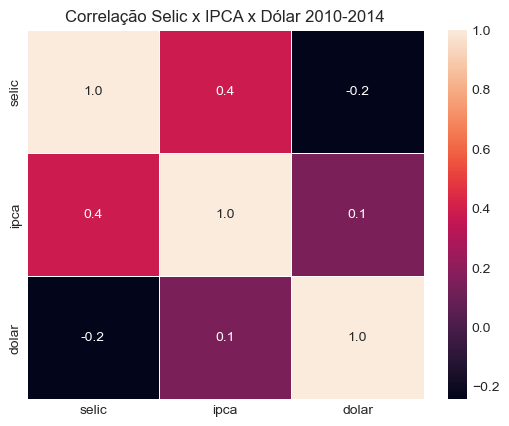

In [14]:
correlation = periodo1.corr()
plt.title('Correlação Selic x IPCA x Dólar 2010-2014')
sns.heatmap(correlation, annot=True, fmt='.1f', linewidths=.6)

<Axes: title={'center': 'Correlação Selic x IPCA x Dólar 2015-2016'}>

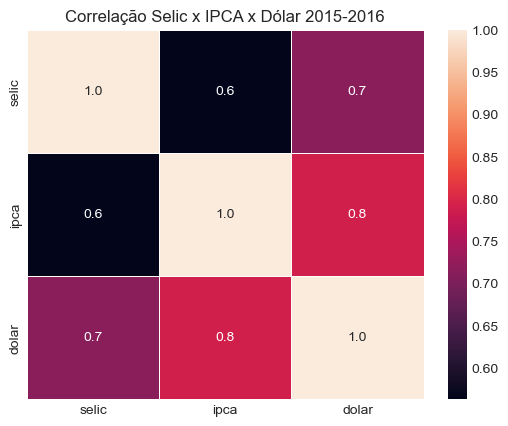

In [15]:
correlation = periodo2.corr()
plt.title('Correlação Selic x IPCA x Dólar 2015-2016')
sns.heatmap(correlation, annot=True, fmt='.1f', linewidths=.6)

<Axes: title={'center': 'Correlação Selic x IPCA x Dólar 2017-2019'}>

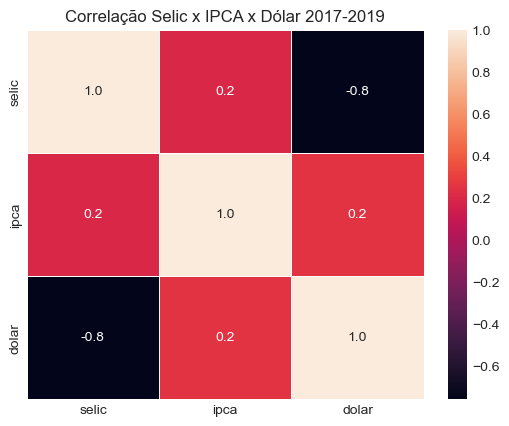

In [16]:
correlation = periodo3.corr()
plt.title('Correlação Selic x IPCA x Dólar 2017-2019')
sns.heatmap(correlation, annot=True, fmt='.1f', linewidths=.6)

<Axes: title={'center': 'Correlação Selic x IPCA x Dólar 2020'}>

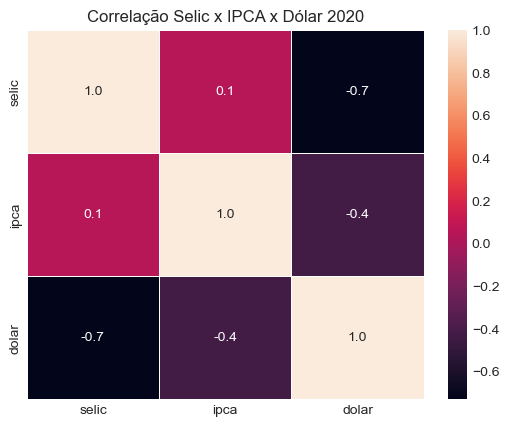

In [17]:
correlation = periodo4.corr()
plt.title('Correlação Selic x IPCA x Dólar 2020')
sns.heatmap(correlation, annot=True, fmt='.1f', linewidths=.6)

<Axes: title={'center': 'Correlação Selic x IPCA x Dólar 2021-2022'}>

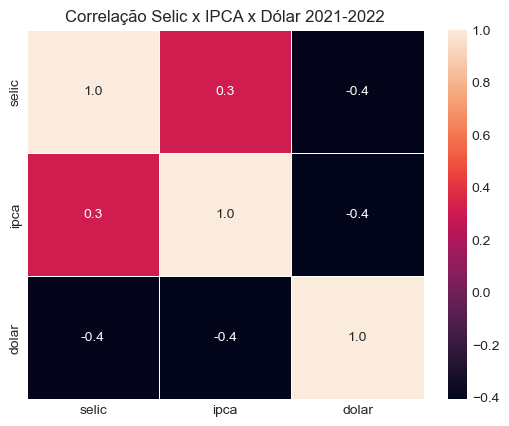

In [18]:
correlation = periodo5.corr()
plt.title('Correlação Selic x IPCA x Dólar 2021-2022')
sns.heatmap(correlation, annot=True, fmt='.1f', linewidths=.6)

<Axes: title={'center': 'Correlação Selic x IPCA x Dólar 2023-2025'}>

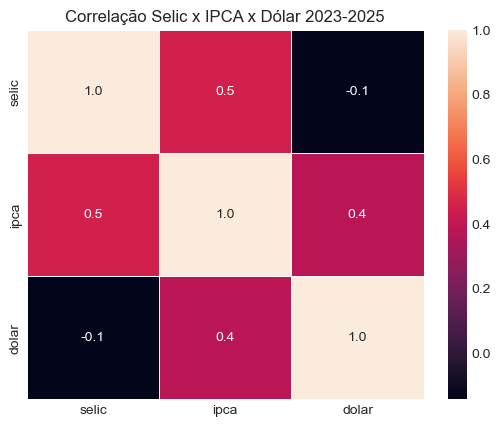

In [19]:
correlation = periodo6.corr()
plt.title('Correlação Selic x IPCA x Dólar 2023-2025')
sns.heatmap(correlation, annot=True, fmt='.1f', linewidths=.6)

O que podemos observar?

As relações macroeconômicas são muito complexas e voláteis a diversas situações. No geral, a Selic e o IPCA possuem uma correlação positiva moderada, isso se dá pelo fato de quando a inflação sobe a política monetária brasileira tende a subir os juros junto para controlar a inflação, porém a mudança não é imediata, ela é sentida com o tempo  o que causa essa correlação positiva mesmo a Selic sendo um "remédio" contra a inflação. Quanto ao Dólar, desde a sua alta repentina em 2015, onde ele afeta diretamente na inflação, ele vem constantemente subindo de preço e os diversos regimes políticos, crises internas e externas acabam afetando a inflação no país.

## Análise de Séries Temporais

Série Temporal é um conjunto de observações sobre uma variável, ordenado no tempo, e registrado em períodos regulares.

O objetivo da análise de séries temporais é identificar padrões não aleatórios na série temporal de uma variável de interesse, e a observação deste comportamento passado pode permitir fazer previsões sobre o futuro, orientando a tomada de decisões.

### Modelo VAR (Vector Autoregression)

O VAR (Vetores Autorregressivos) é um modelo estatístico multivariado aplicado a séries temporais. Ele permite analisar como múltiplas variáveis (como IPCA, SELIC e câmbio) evoluem ao longo do tempo, considerando as defasagens (lags) de todas as variáveis no sistema. O grande diferencial é que o VAR trata todas as variáveis como endógenas, ou seja, cada uma pode ser explicada pelas próprias defasagens e pelas das demais variáveis.

Assim, modelos VAR são bastante usados para capturar e prever a dinâmica conjunta de indicadores econômicos, como inflação, taxa de juros e câmbio, além de conseguir medir como choques em uma variável (por exemplo, aumento da Selic) impactam as demais ao longo do tempo.

Antes de aplicar o modelo VAR, precisamos verificar se as séries são estacionárias.

#### Augmented Dickey Fuller (ADF)

O Teste ADF é usado para determinar a presença de raiz unitária nas séries, e portanto, verificar se a série é estacionária ou não.

- Hipótese Nula H0: a série contém raíz unitária
- Hipótese alternativa: a série não contém raíz unitária

p-valor < 0,05: rejeita a hipótese nula -> a série é estacionária

p-valor >= 0,05: rejeita a hipótese alternativa -> a série não é estacionária

In [20]:
ipca = df.ipca
selic = df.selic
dolar = df.dolar

In [21]:
resultado_ipca = adfuller(ipca)

print('Estatística do teste: ', resultado_ipca[0])
print('p-valor: ', resultado_ipca[1])
for key, value in resultado_ipca[4].items():
    print(f'Valor crítico: {key}: {value}')

Estatística do teste:  -2.8256140313060767
p-valor:  0.05470710866835161
Valor crítico: 1%: -3.4687256239864017
Valor crítico: 5%: -2.8783961376954363
Valor crítico: 10%: -2.57575634100705


p-valor = 0.05 -> rejeita hipótese alternativa. O teste indica que a série não é estacionária.

#### Kwiatkowski-Phillips-Schmidt-Shin (KPSS)

O KPSS é outro teste para checar se a série é estacionária. As hipóteses do KPSS são o oposto do ADF.

- Hipótese Nula H0: a série não contém raíz unitária
- Hipótese alternativa Ha: a série contém raíz unitária

p-valor < 0,05: rejeita a hipótese nula -> a série não é estacionária

p-valor >= 0,05: rejeita a hipótese alternativa -> a série é estacionária

In [22]:
resultado_ipca = kpss(ipca)

print('Estatística do teste: ', resultado_ipca[0])
print('p-valor: ', resultado_ipca[1])
for key, value in resultado_ipca[3].items():
    print(f'Valor crítico: {key}: {value}')

Estatística do teste:  0.108356896586481
p-valor:  0.1
Valor crítico: 10%: 0.347
Valor crítico: 5%: 0.463
Valor crítico: 2.5%: 0.574
Valor crítico: 1%: 0.739


p-valor 0.1 -> rejeita hipótese alternativa. O teste indica que a série é estacionária

O teste KPSS indica estacionaridade, enquanto o teste ADF não indica estacionaridade. A série possui uma tendência estacionária, porém precisamos remover a tendência para que a série seja estritamente estacionária.

Vamos aplicar a diferenciação para remover a tendência da série.

In [23]:
# Diferenciação

ipca_diff = ipca.diff().dropna()

In [24]:
resultado_ipca = adfuller(ipca_diff)

print('Estatística do teste: ', resultado_ipca[0])
print('p-valor: ', resultado_ipca[1])
for key, value in resultado_ipca[4].items():
    print(f'Valor crítico: {key}: {value}')

Estatística do teste:  -4.298130276510944
p-valor:  0.0004475357473296452
Valor crítico: 1%: -3.469413468959902
Valor crítico: 5%: -2.8786964197028295
Valor crítico: 10%: -2.5759166089965397


In [25]:
resultado_ipca = kpss(ipca_diff)

print('Estatística do teste: ', resultado_ipca[0])
print('p-valor: ', resultado_ipca[1])
for key, value in resultado_ipca[3].items():
    print(f'Valor crítico: {key}: {value}')

Estatística do teste:  0.05830431990570159
p-valor:  0.1
Valor crítico: 10%: 0.347
Valor crítico: 5%: 0.463
Valor crítico: 2.5%: 0.574
Valor crítico: 1%: 0.739


Agora sim, ambos os testes indicam estacionaridade para a série IPCA.

Vamos testar as outras séries.

In [26]:
resultado_selic = adfuller(selic)

print('Estatística do teste: ', resultado_selic[0])
print('p-valor: ', resultado_selic[1])
for key, value in resultado_selic[4].items():
    print(f'Valor crítico: {key}: {value}')

Estatística do teste:  -1.9549311721809124
p-valor:  0.30667687016590467
Valor crítico: 1%: -3.467845319799907
Valor crítico: 5%: -2.878011745497439
Valor crítico: 10%: -2.575551186759871


In [27]:
resultado_selic = kpss(selic)

print('Estatística do teste: ', resultado_selic[0])
print('p-valor: ', resultado_selic[1])
for key, value in resultado_selic[3].items():
    print(f'Valor crítico: {key}: {value}')

Estatística do teste:  0.18390795552908298
p-valor:  0.1
Valor crítico: 10%: 0.347
Valor crítico: 5%: 0.463
Valor crítico: 2.5%: 0.574
Valor crítico: 1%: 0.739


Novamente, temos uma diferença nos testes.

In [28]:
selic_diff = selic.diff().dropna()

In [29]:
resultado_selic = adfuller(selic_diff)

print('Estatística do teste: ', resultado_selic[0])
print('p-valor: ', resultado_selic[1])
for key, value in resultado_selic[4].items():
    print(f'Valor crítico: {key}: {value}')

Estatística do teste:  -4.003448342863967
p-valor:  0.0013925619663466755
Valor crítico: 1%: -3.467845319799907
Valor crítico: 5%: -2.878011745497439
Valor crítico: 10%: -2.575551186759871


In [30]:
resultado_selic = kpss(selic_diff)

print('Estatística do teste: ', resultado_selic[0])
print('p-valor: ', resultado_selic[1])
for key, value in resultado_selic[3].items():
    print(f'Valor crítico: {key}: {value}')

Estatística do teste:  0.11980537197585578
p-valor:  0.1
Valor crítico: 10%: 0.347
Valor crítico: 5%: 0.463
Valor crítico: 2.5%: 0.574
Valor crítico: 1%: 0.739


Após a diferenciação, os dois testes indicam estacionaridade para série Selic.

In [31]:
resultado_dolar = adfuller(dolar)

print('Estatística do teste: ', resultado_dolar[0])
print('p-valor: ', resultado_dolar[1])
for key, value in resultado_dolar[4].items():
    print(f'Valor crítico: {key}: {value}')

Estatística do teste:  -0.7193087020947664
p-valor:  0.8416845568969127
Valor crítico: 1%: -3.466005071659723
Valor crítico: 5%: -2.8772078537639385
Valor crítico: 10%: -2.5751221620996647


In [32]:
resultado_dolar = kpss(dolar)

print('Estatística do teste: ', resultado_dolar[0])
print('p-valor: ', resultado_dolar[1])
for key, value in resultado_dolar[3].items():
    print(f'Valor crítico: {key}: {value}')

Estatística do teste:  1.8632788294154654
p-valor:  0.01
Valor crítico: 10%: 0.347
Valor crítico: 5%: 0.463
Valor crítico: 2.5%: 0.574
Valor crítico: 1%: 0.739


Para a série Dólar, os dois testes indicam que não existe estacionaridade.

Vamos fazer a diferenciação e observar os novos testes.

In [33]:
dolar_diff = dolar.diff().dropna()

In [34]:
resultado_dolar = adfuller(dolar_diff)

print('Estatística do teste: ', resultado_dolar[0])
print('p-valor: ', resultado_dolar[1])
for key, value in resultado_dolar[4].items():
    print(f'Valor crítico: {key}: {value}')

Estatística do teste:  -13.41743120031946
p-valor:  4.254770851362999e-25
Valor crítico: 1%: -3.4662005731940853
Valor crítico: 5%: -2.8772932777920364
Valor crítico: 10%: -2.575167750182615


In [35]:
resultado_dolar = kpss(dolar_diff)

print('Estatística do teste: ', resultado_dolar[0])
print('p-valor: ', resultado_dolar[1])
for key, value in resultado_dolar[3].items():
    print(f'Valor crítico: {key}: {value}')

Estatística do teste:  0.04874390784326271
p-valor:  0.1
Valor crítico: 10%: 0.347
Valor crítico: 5%: 0.463
Valor crítico: 2.5%: 0.574
Valor crítico: 1%: 0.739


Agora os dois testes indicam estacionaridade para a série Câmbio.

#### Aplicando o modelo VAR

Agora que já testamos as séries e vimos que elas são estacionárias podemos aplicar o modelo VAR.

Vamos começar selecionando o número ideal de defasagens. 

In [36]:
# Vamos começar unindo as séries diferenciadas em um único dataframe

df_diff = pd.concat([ipca_diff, selic_diff, dolar_diff], axis=1)
df_diff.columns = ['ipca', 'selic', 'dolar']

In [37]:
# Criando o modelo VAR

model = VAR(df_diff)
lag_order = model.select_order(maxlags=12)
print(lag_order.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -6.978      -6.923   0.0009324      -6.956
1       -8.220     -8.002*   0.0002692      -8.132
2       -8.352      -7.971   0.0002360     -8.197*
3       -8.413      -7.869   0.0002220      -8.192
4      -8.469*      -7.761  0.0002100*      -8.182
5       -8.405      -7.534   0.0002240      -8.052
6       -8.361      -7.326   0.0002344      -7.941
7       -8.378      -7.179   0.0002309      -7.892
8       -8.373      -7.011   0.0002324      -7.821
9       -8.360      -6.835   0.0002359      -7.742
10      -8.277      -6.589   0.0002572      -7.592
11      -8.267      -6.415   0.0002609      -7.515
12      -8.402      -6.387   0.0002289      -7.584
--------------------------------------------------


O modelo sugere que usemos 1 mês de defasagem para uma abordagem mais conservadora. Vamos primeiro testar com um mês de defasagem:

In [38]:
var_model = model.fit(1)
print(var_model.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 03, Dec, 2025
Time:                     14:22:29
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -8.12558
Nobs:                     185.000    HQIC:                  -8.24981
Log likelihood:          -4.57221    FPE:                0.000240101
AIC:                     -8.33447    Det(Omega_mle):     0.000225177
--------------------------------------------------------------------
Results for equation ipca
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const            0.008356         0.029856            0.280           0.780
L1.ipca          0.527869         0.063632            8.296           0.000
L1.selic         0.028169         0.081706            0.345           0.730
L1.do

#### Entendendo o teste

O modelo estima como a variação de um série é explicada por ela mesma e pelas demais através dos períodos de defasagens, no nosso caso, um mês. Se o p-valor (prob) for **menor** que 0,05 o resultado é estatisticamente forte. Caso o p-valor seja **maior** ou igual a 0,05 o resultado é considerado estatisticamente fraco.

Então, o que podemos observar através deste teste:

Para o IPCA -> A variação passada do IPCA explica 52% da variação atual, o que é alto. A variação da Selic não apresentou significância estatística, enquanto o modelo estimou uma relação negativa para Dólar e IPCA.

Para a Selic -> A variação do IPCA sugere um aumento na Selic. A variação passada da Selic explica 76% da variação atual, e a relação com o Dólar não é significativo estatisticamente.

Para o Dólar -> Todas as variáveis são estatisticamente fracas. Sugere, nesse modelo, que as variações do dólar não são bem explicadas pelas defasagens dessas variáveis, no período/modelo.

### Validação do Modelo

##### Análise de Resíduos

Os resíduos devem parecer ruído branco (sem autocorrelação).

O p-valor do teste Ljung-Box deve ser >0.05 para todos os lags, indicando ausência de autocorrelação.

In [39]:
for col in df_diff.columns:
    resid = var_model.resid[col]
    test = acorr_ljungbox(resid, lags=[10], return_df=True)
    print(f'Resultado para resíduos de {col}:')
    print(test)

Resultado para resíduos de ipca:
      lb_stat  lb_pvalue
10  10.697732   0.381547
Resultado para resíduos de selic:
     lb_stat     lb_pvalue
10  65.52669  3.213685e-10
Resultado para resíduos de dolar:
    lb_stat  lb_pvalue
10  5.02997   0.889167


IPCA e Dólar estão ok e são tratados como ruído branco. Já a Selic está apresentando forte autocorrelação.

Isso nos mostra que o modelo não está captando bem a dinâmica da série Selic.

##### Estabilidade do Modelo

O modelo deve retornar True para ser considerado estável.

In [40]:
print(var_model.is_stable(verbose=True))

Eigenvalues of VAR(1) rep
0.7826801661993352
0.4822607171097038
0.020311068032640947
True


O modelo VAR é estável.

##### Normalidade dos Resíduos

Para o teste Jarque-Bera: p-valor alto (>0.05) sugere que a distribuição dos resíduos é próxima da normal.

In [41]:
for col in df_diff.columns:
    jb = jarque_bera(var_model.resid[col])
    print(f'Resíduos de {col}: JB={jb.statistic:.2f}, p-valor={jb.pvalue:.3f}')

Resíduos de ipca: JB=52.97, p-valor=0.000
Resíduos de selic: JB=98.01, p-valor=0.000
Resíduos de dolar: JB=22.01, p-valor=0.000


Os resíduos apresentam desvios da normalidade, o que é comum em séries econômicas.

In [42]:
# Resumo de Diagnóstico

print("=" * 60)
print("RESUMO DE DIAGNÓSTICO DO MODELO VAR")
print("=" * 60)
print(f"\n✓ Estacionariedade: APROVADO (todas as séries diferenciadas)")
print(f"✓ Estabilidade do VAR: {var_model.is_stable()}")
print(f"\n⚠ Atenção: Selic tem autocorrelação residual relevante")
print(f"  Recomendação: Considerar aumento de lags ou variáveis adicionais")

RESUMO DE DIAGNÓSTICO DO MODELO VAR

✓ Estacionariedade: APROVADO (todas as séries diferenciadas)
✓ Estabilidade do VAR: True

⚠ Atenção: Selic tem autocorrelação residual relevante
  Recomendação: Considerar aumento de lags ou variáveis adicionais


### Função Impulso-Resposta (IRF)

Agora que temos um modelo VAR, podemos aplicar um choque (aumento repentino) em alguma variável e analisar como as outras irão reagiar ao longo do próximos meses.

In [43]:
irf = var_model.irf(12)

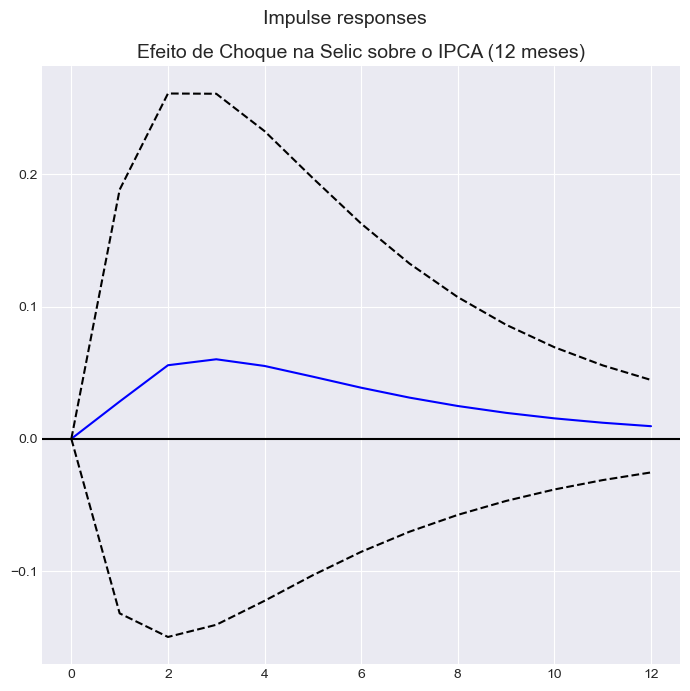

In [44]:
graph = irf.plot(impulse='selic', response='ipca', orth=False, figsize=(7,7))
plt.title('Efeito de Choque na Selic sobre o IPCA (12 meses)', fontsize=14)
plt.tight_layout()
plt.show()

O gráfico indica que um choque da Selic resultaria em um pequeno aumento no IPCA nos 2-4 primeiros meses, depois a série vai se estabilizando com o tempo.

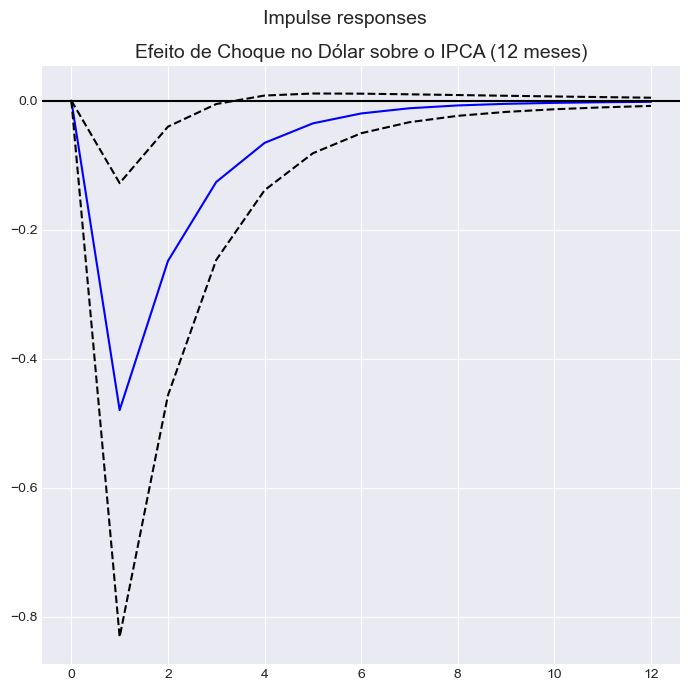

In [45]:
graph = irf.plot(impulse='dolar', response='ipca', orth=False, figsize = (7,7))
plt.title('Efeito de Choque no Dólar sobre o IPCA (12 meses)', fontsize=14)
plt.tight_layout()
plt.show()

O gráfico indica que um choque na variável Dólar causa uma queda repentina no IPCA que vai se estabilizando, após 3-4 meses.

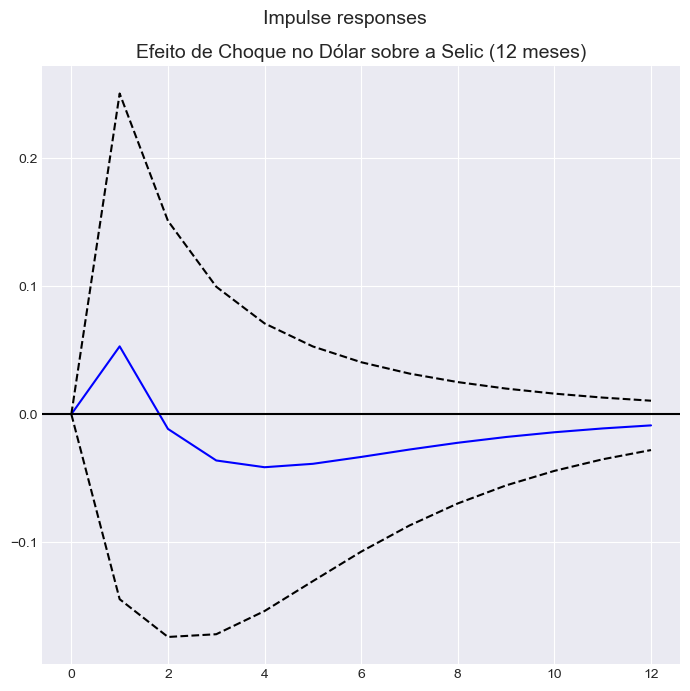

In [46]:
graph = irf.plot(impulse='dolar', response='selic', orth=False, figsize = (7,7))
plt.title('Efeito de Choque no Dólar sobre a Selic (12 meses)', fontsize=14)
plt.tight_layout()
plt.show()

O gráfico indica que um choque no Dólar causa um pequeno aumento na variação da Selic, seguido por uma queda da mesma, até se estabilizar.

### Resumo Final do Projeto

Após realizarmos diversas análises gráficas, análises estatísticas e testes, podemos observar que as relações econômicos são extremamente complexas. As análises gráficas e estatísticas servem como base para entendermos a relação entre os três principais índices econômicos da economia brasileira o IPCA, a Selic e a Taxa de Câmbio de Dólar.

**Análise Inicial: O que podemos concluir?**

- O gráfico de linhas temporais nos mostra uma relação entre as três variáveis, as linhas da Selic e do IPCA parecem corresponder uma à outra e responder à variação do Dólar.

- A análise estatística nos mostra que o Dólar sofre variações, porém sempre com uma tendência de aumento, além disso nos mostra a periodicidade da taxa Selic e a variação da inflação conforme os ciclos da economia.

- A partir das matrizes de correlação podemos identificar como uma variável é relacionada com a outra.

Além de estudar o comportamento direto das séries, é interessante realizar um estudo de comportamento multivariado ao longo do tempo das séries econômicas. Para isso foi utilizado o modelo VAR, que consegue capturar a dinâmica das variavéis através de períodos de defasagens.

**Análise de Séries Temporais:**

- O modelo conseguiu captar um pouco da dinâmica entre Selic e IPCA, onde o aumento de uma variável tende a provocar o aumento da outra. Para o série Dólar o modelo foi considerado estatisticamente fraco.

- O diagnóstico do modelo apresentou um modelo estável e estacionário, porém a série Selic apresentou alta correlação, o que explica o fato do modelo não ter captado tão bem a dinâmica da série.

- Utilizamos também uma Função Impulso-Resposta para identificar padrões de resposta de uma variável em relação ao choque (aumento repentino) da outra.

**Recomendações para estudos futuros:**

- Aumentar o número de lags (defasagens) e testar novamente como as séries se comportam.
- Aumentar o número de variáveis do estudo, exemplo (IBovespa, atividade econômica, expectativas de inflação, etc.).